# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
%pip install --upgrade plotly

     ---------------------------------------- 15.6/15.6 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.14.1
    Uninstalling plotly-5.14.1:
      Successfully uninstalled plotly-5.14.1
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [5]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [6]:
mask = df_data.isna()
has_null = mask.any(axis=1)
df_data[has_null]

year    category                                           prize  \
1    1901  Literature              The Nobel Prize in Literature 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
7    1902  Literature              The Nobel Prize in Literature 1902   
9    1902       Peace                      The Nobel Peace Prize 1902   
..    ...         ...                                             ...   
942  2019  Literature              The Nobel Prize in Literature 2019   
946  2019       Peace                      The Nobel Peace Prize 2019   
954  2020  Literature              The Nobel Prize in Literature 2020   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   

                                            motivation prize_share  \
1    "in special recognition of his poetic composit...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
7    "the greatest living master of the art of hist...         1/1   
9                                                  NaN         1/2   
..                                                 ...         ...   
942  “for an influential work that with linguistic ...         1/1   
946  “for his efforts to achieve peace and internat...         1/1   
954  “for her unmistakable poetic voice that with a...         1/1   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   

    laureate_type                           full_name  birth_date  \
1      Individual                     Sully Prudhomme  1839-03-16   
3      Individual                      Frédéric Passy  1822-05-20   
4      Individual                   Jean Henry Dunant  1828-05-08   
7      Individual  Christian Matthias Theodor Mommsen  1817-11-30   
9      Individual                Charles Albert Gobat  1843-05-21   
..            ...                                 ...         ...   
942    Individual                        Peter Handke  1942-12-06   
946    Individual                      Abiy Ahmed Ali  1976-08-15   
954    Individual                        Louise Glück  1943-04-22   
957    Individual                    Michael Houghton  1949-07-02   
958  Organization          World Food Programme (WFP)         NaN   

       birth_city             birth_country     birth_country_current     sex  \
1           Paris                    France                    France    Male   
3           Paris                    France                    France    Male   
4          Geneva               Switzerland               Switzerland    Male   
7         Garding       Schleswig (Germany)                   Germany    Male   
9        Tramelan               Switzerland               Switzerland    Male   
..            ...                       ...                       ...     ...   
942       Griffen                   Austria                   Austria    Male   
946      Beshasha                  Ethiopia                  Ethiopia    Male   
954  New York, NY  United States of America  United States of America  Female   
957           NaN            United Kingdom            United Kingdom    Male   
958           NaN                       NaN                       NaN     NaN   

         organization_name organization_city organization_country  ISO  
1                      NaN               NaN                  NaN  FRA  
3                      NaN               NaN                  NaN  FRA  
4                      NaN               NaN                  NaN  CHE  
7                      NaN               NaN                  NaN  DEU  
9                      NaN               NaN                  NaN  CHE  
..                     ...               ...   

In [7]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])
mask = df_data.groupby("prize")["year"].count().apply(lambda x: 1/ x )
df_data["share_pct"] = df_data["prize"].map(mask)
df_data[["prize","share_pct"]]

prize  share_pct
0                 The Nobel Prize in Chemistry 1901       1.00
1                The Nobel Prize in Literature 1901       1.00
2    The Nobel Prize in Physiology or Medicine 1901       1.00
3                        The Nobel Peace Prize 1901       0.50
4                        The Nobel Peace Prize 1901       0.50
..                                              ...        ...
957  The Nobel Prize in Physiology or Medicine 2020       0.33
958                      The Nobel Peace Prize 2020       1.00
959                 The Nobel Prize in Physics 2020       0.33
960                 The Nobel Prize in Physics 2020       0.33
961                 The Nobel Prize in Physics 2020       0.33

[962 rows x 2 columns]

In [8]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

year    category laureate_type                           full_name  \
1    1901  Literature    Individual                     Sully Prudhomme   
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

    organization_name  
1                 NaN  
3                 NaN  
4                 NaN  
7                 NaN  
9                 NaN  
..                ...  
932               NaN  
942               NaN  
946               NaN  
954               NaN  
958               NaN  

[255 rows x 5 columns]

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [9]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

#### Add a Column with the Prize Share as a Percentage

In [10]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [12]:
biology = df_data.sex.value_counts()
fig = px.pie(labels=biology.index, 
             values=biology.values,
             title="Percentage of Male vs. Female Winners",
             names=biology.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

C:\Users\Daniele\anaconda3\lib\site-packages\plotly\express\_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [13]:
df_data.loc[df_data.sex == "Female"][:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

# Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they? 

In [14]:
# Alternative:
multiple_winners = df_data.groupby(by = 'full_name').filter(lambda x : x['year'].count() >= 2)
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [15]:
df_data.category.unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [16]:
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

In [17]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [18]:
df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})

category     sex  prize
0    Chemistry  Female      7
1    Chemistry    Male    179
2    Economics  Female      2
3    Economics    Male     84
4   Literature  Female     16
5   Literature    Male    101
6     Medicine  Female     12
7     Medicine    Male    210
8        Peace  Female     17
9        Peace    Male     90
10     Physics  Female      4
11     Physics    Male    212

In [19]:
pd.Series

pandas.core.series.Series

In [20]:
df = df_data.groupby("year").count().prize 

# Male and Female Winners by Category

Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<Axes: xlabel='year'>

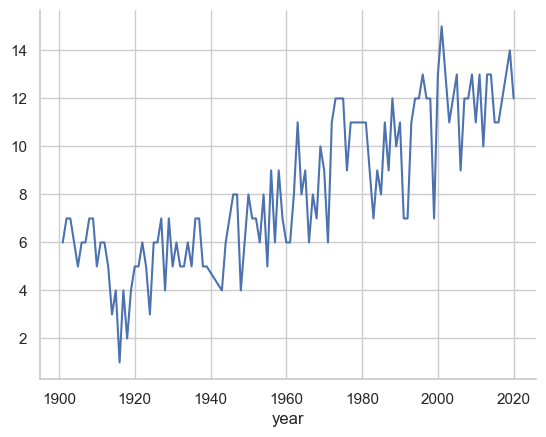

In [21]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
sns.lineplot(data=df, x=df.index,y=df.values)

<Axes: xlabel='year'>

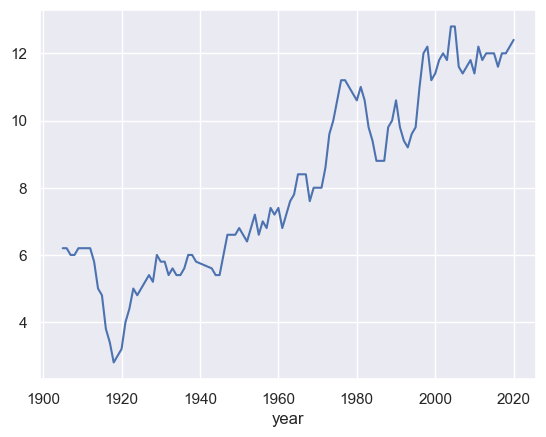

In [22]:
df_2 = df.rolling(5).mean()
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_2, x="year",y=df_2.values)

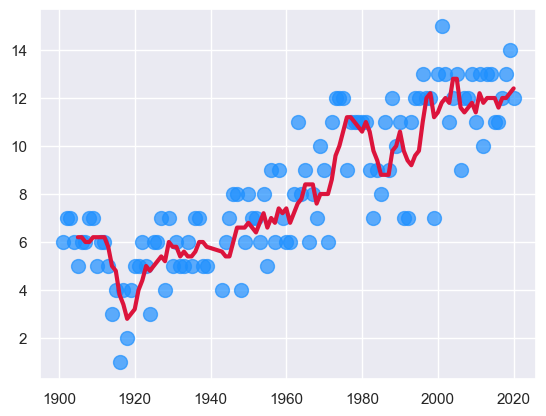

In [23]:
plt.scatter(x=df.index, 
           y=df.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
plt.plot(df.index, 
        df_2.values, 
        c='crimson', 
        linewidth=3,)
arr= np.arange(1990,2020,5)
plt.show()

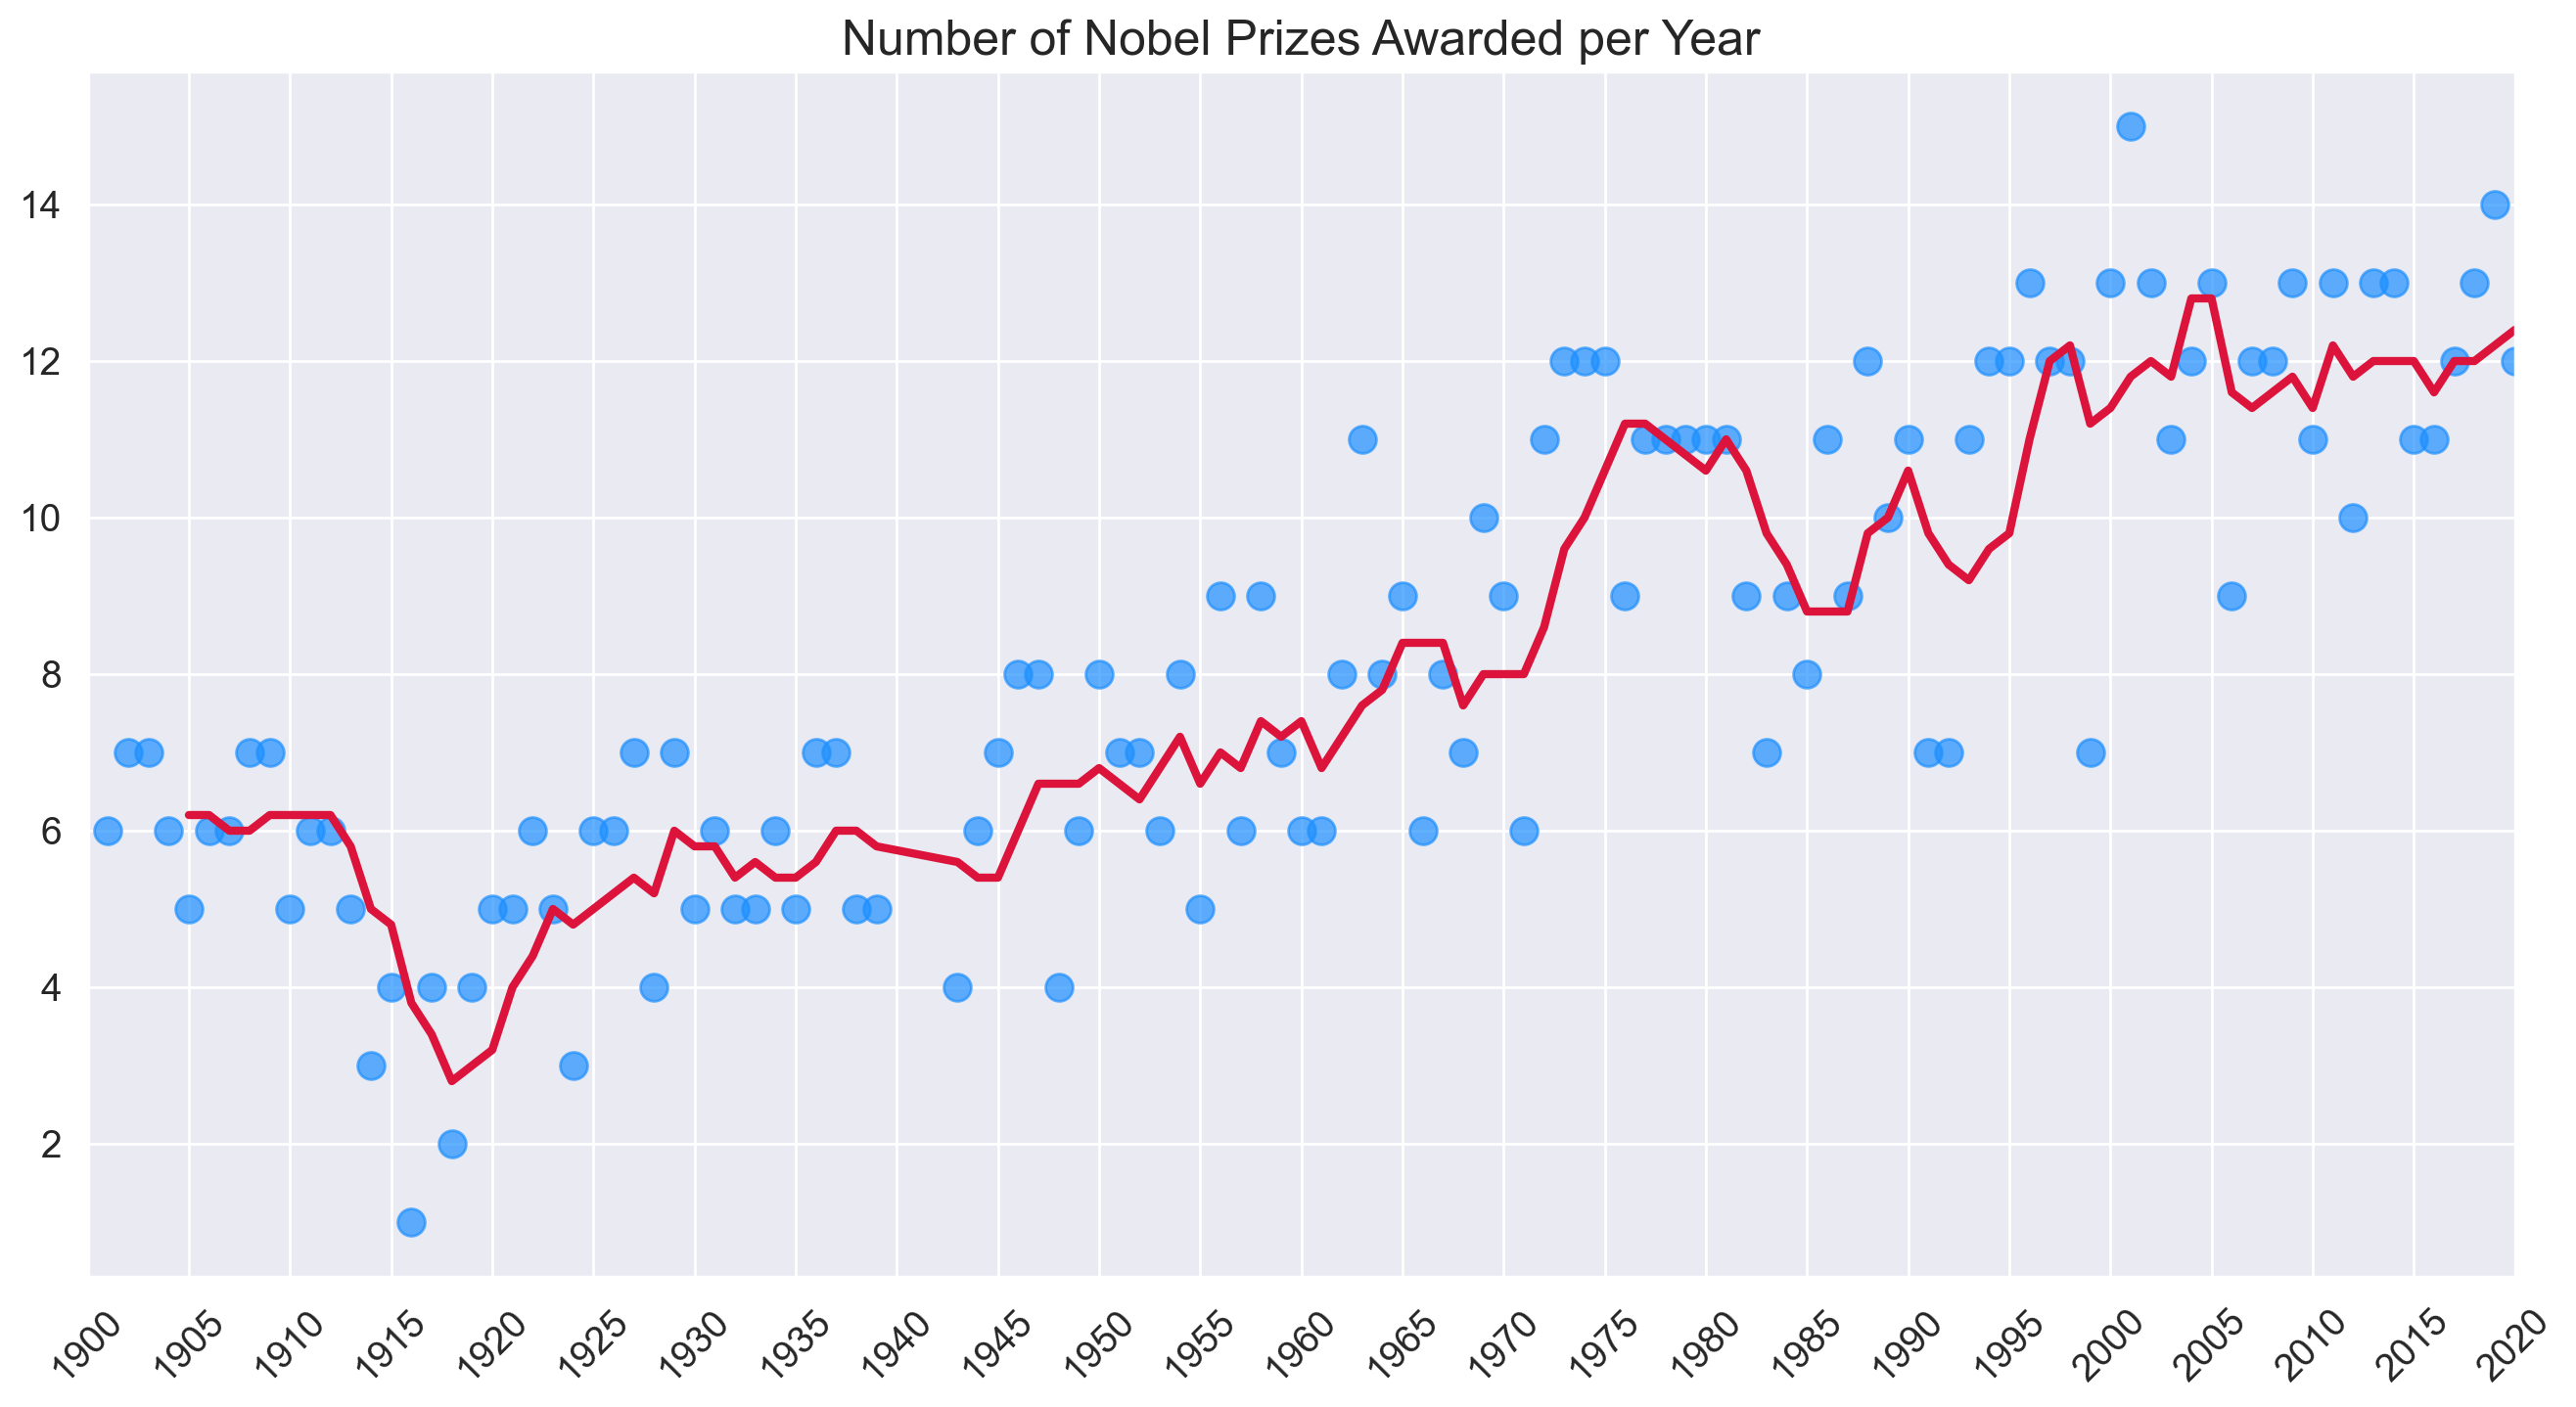

In [24]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
ax.scatter(x=df.index, 
           y=df.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
ax.plot(df.indfs
        c='crimson', adfsdf
        linewidth=3,)www
plt.show()

# Number of Prizes Awarded Over Time
Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020.


* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 


* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [25]:
df_3 = df_data.groupby("year").agg({'share_pct': pd.Series.mean})
df_av = df_3.rolling(5).mean()
df_av

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

# Are More Prizes Shared Than Before?

Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

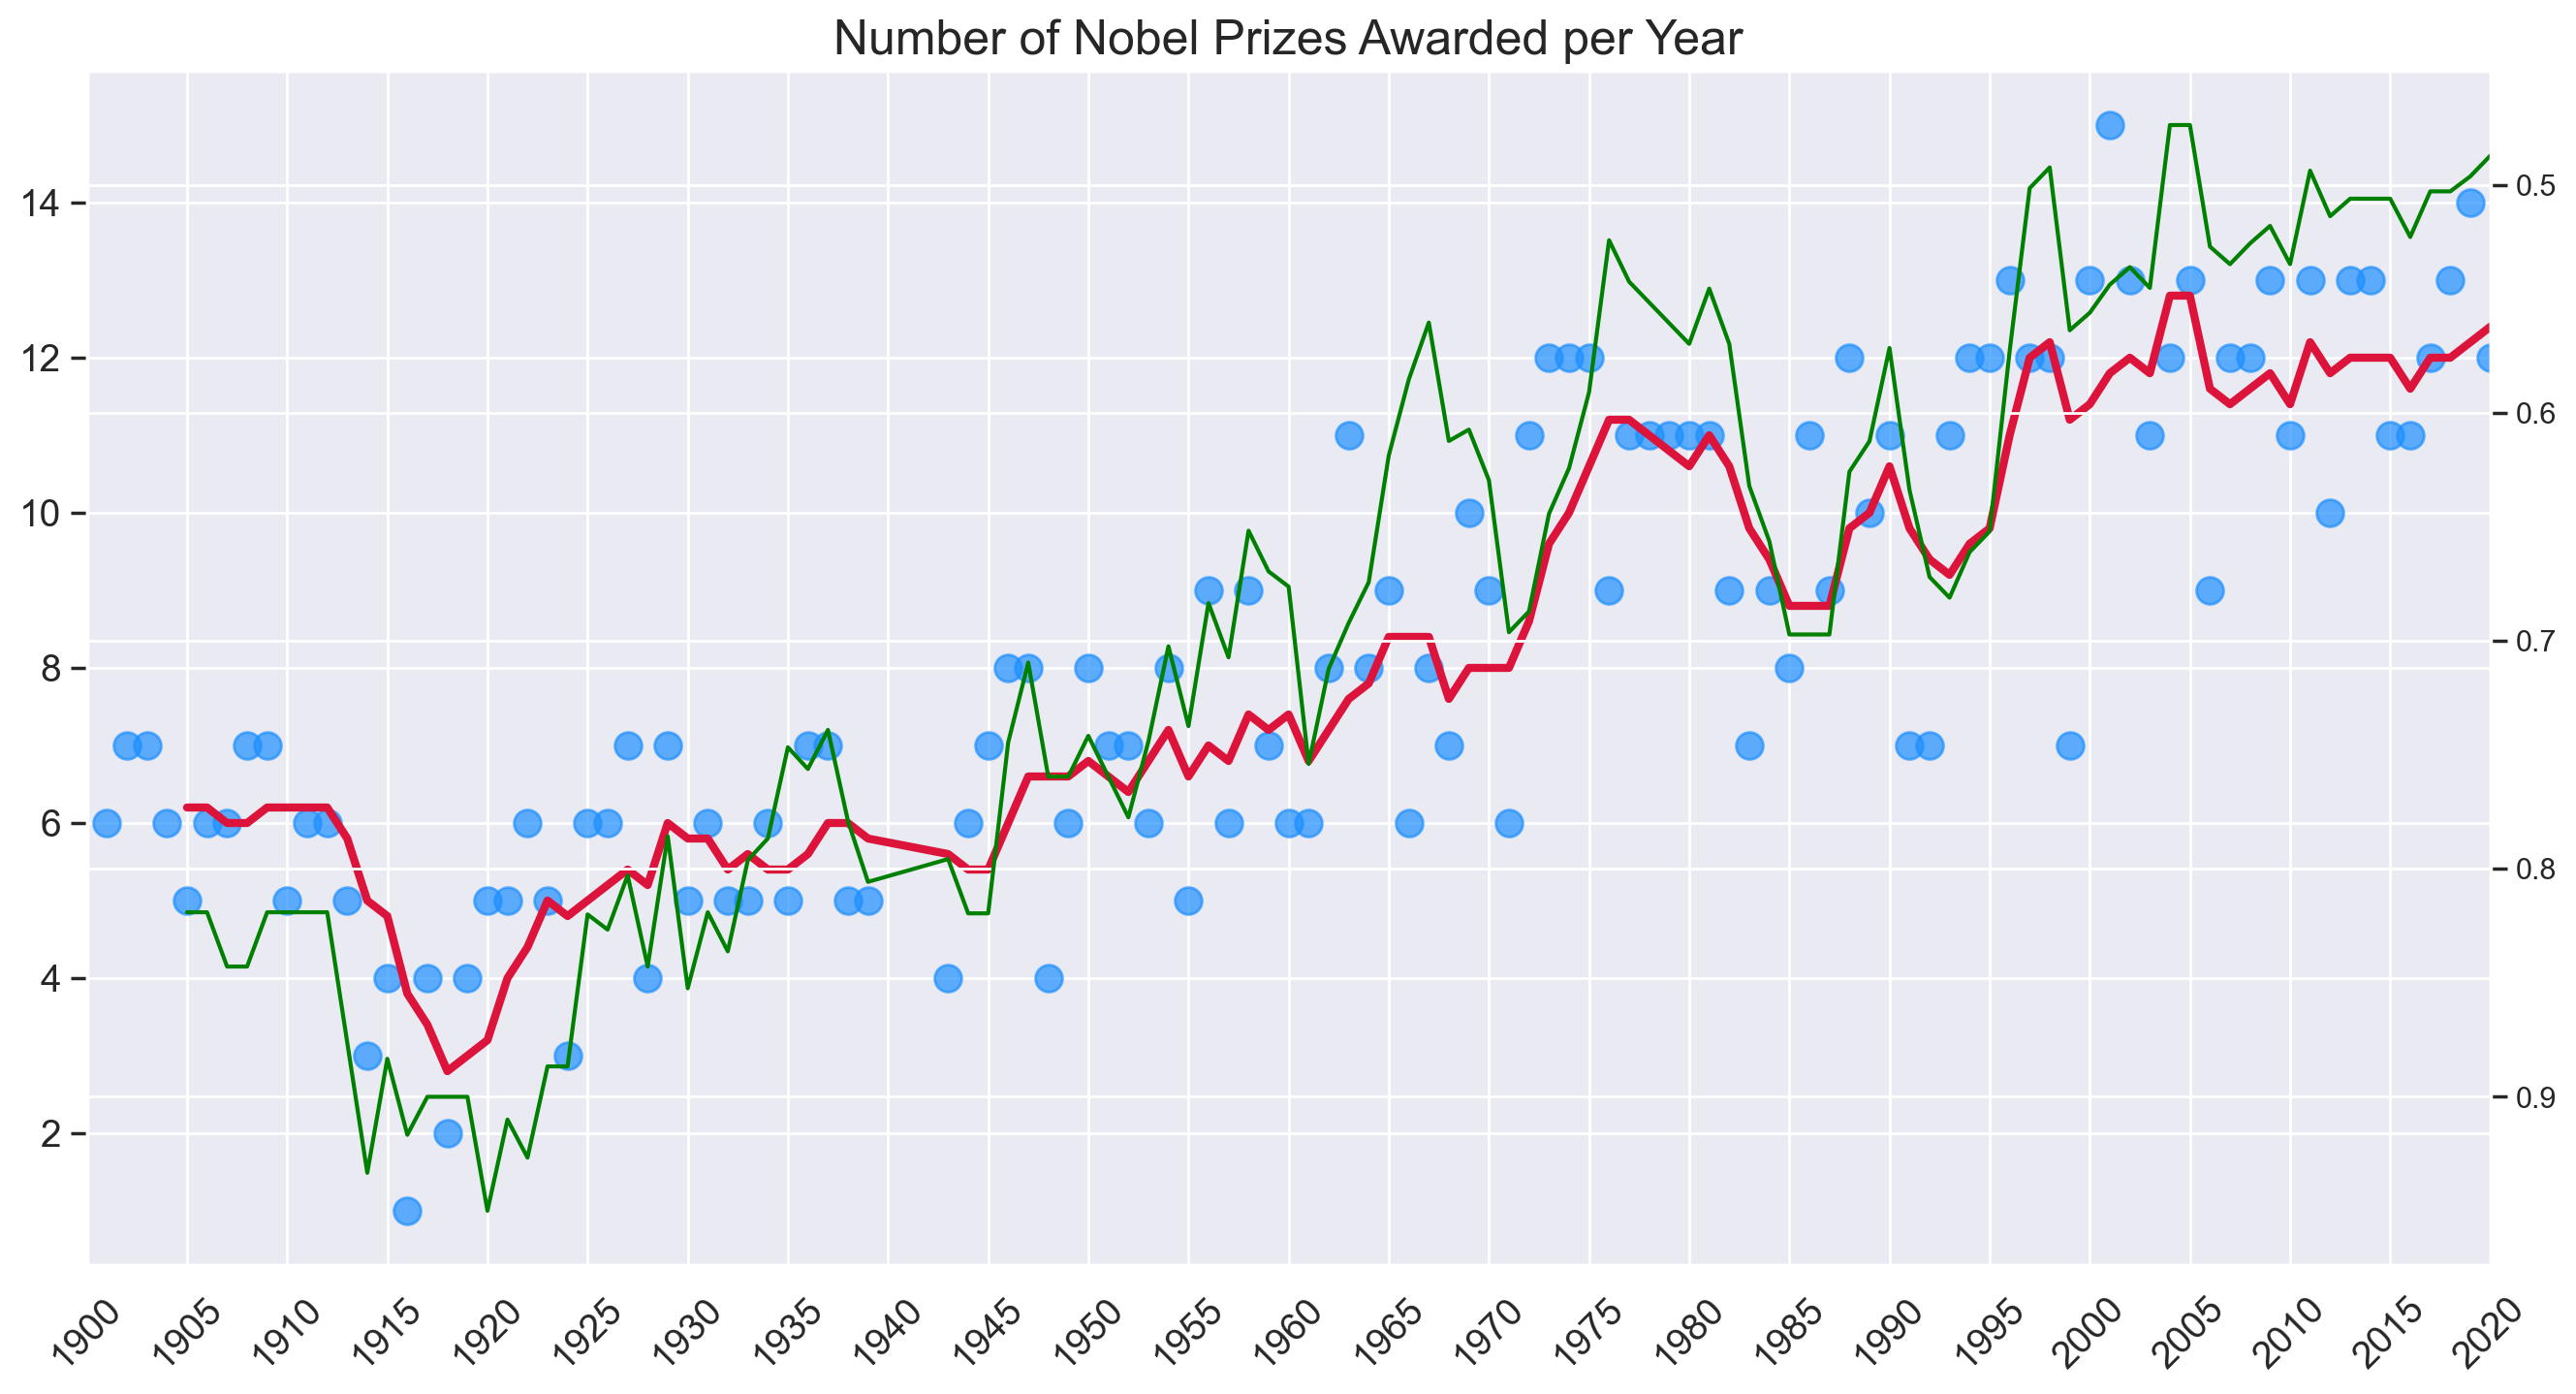

In [26]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
ax = plt.gca() # get current axis
ax2=ax.twinx()
ax2.plot(df.index, df_av,c='green')
ax2.invert_yaxis()
ax.set_xlim(1900, 2020)
ax.scatter(x=df.index, 
           y=df.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
ax.plot(df.index, 
        df_2.values, 
        c='crimson', 
        linewidth=3,)
plt.show()

In [27]:
top20_countries = df_data.groupby("birth_country_current").count().prize.sort_values(ascending=False)[:20]

top20_countries2 = df_data.groupby("ISO").count().prize.sort_values(ascending=False)
top20_countries2

ISO
USA    281
GBR    105
DEU     84
FRA     57
SWE     29
      ... 
LVA      1
MAR      1
MDG      1
MKD      1
ZWE      1
Name: prize, Length: 79, dtype: int64

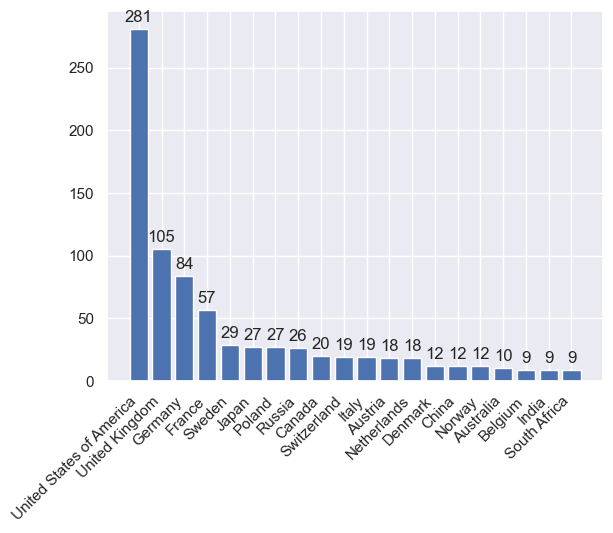

In [28]:

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
fig = plt.bar(top20_countries.index,top20_countries.values)

for p in fig:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
plt.show()

# The Countries with the Most Nobel Prizes

* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 


* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:


* What is the ranking for the top 20 countries in terms of the number of prizes?

In [29]:
h_bar = px.bar(x=top20_countries.values,
               y=top20_countries.index,
               orientation='h',
               color=top20_countries.values,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/).

In [30]:
top20_countries
fig = px.choropleth(top20_countries2, locations=top20_countries2.index,
                    color=top20_countries2.values, # lifeExp is a column of gapminder
                    hover_name=top20_countries2.index, # column to add to hover information
                    color_continuous_scale="matter")
fig.show()

In [31]:
top20_countries

birth_country_current
United States of America    281
United Kingdom              105
Germany                      84
France                       57
Sweden                       29
Japan                        27
Poland                       27
Russia                       26
Canada                       20
Switzerland                  19
Italy                        19
Austria                      18
Netherlands                  18
Denmark                      12
China                        12
Norway                       12
Australia                    10
Belgium                       9
India                         9
South Africa                  9
Name: prize, dtype: int64

# In Which Categories are the Different Countries Winning Prizes? 


* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


In [32]:
df_3 = df_data.groupby(["category","birth_country_current"]).count().reset_index()[["category","birth_country_current","year"]].rename(columns={'year':'cat_prize'})
df_3["total_prize"] = df_3["cat_prize"].groupby(df_3["birth_country_current"]).transform("sum")
df_4 = df_3.sort_values("total_prize", ascending=False)[df_3.total_prize > 20]


C:\Users\Daniele\AppData\Local\Temp\ipykernel_17240\1742457288.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [33]:
h_bar = px.bar(x=df_4.cat_prize,
               y=df_4.birth_country_current,
               orientation='h',
               color=df_4.category,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

In [34]:
df_5 = df_data.groupby(["year","birth_country_current"],as_index=False).agg({'prize': pd.Series.count})
df_5

year     birth_country_current  prize
0    1901                    France      2
1    1901                   Germany      1
2    1901               Netherlands      1
3    1901                    Poland      1
4    1901               Switzerland      1
..    ...                       ...    ...
622  2019  United States of America      3
623  2020                    France      1
624  2020                   Germany      1
625  2020            United Kingdom      2
626  2020  United States of America      7

[627 rows x 3 columns]

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [35]:
lines = px.line(x=df_5.year, 
        y=df_5.prize,
        color=df_5.birth_country_current)
lines.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
lines.show()


In [36]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()


In [37]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

birth_country_current  year  category  prize  motivation  prize_share  \
0                     Algeria  1957         1      1           1            1   
1                     Algeria  1997         2      2           2            2   
2                   Argentina  1936         1      1           0            1   
3                   Argentina  1947         2      2           1            2   
4                   Argentina  1980         3      3           1            3   
..                        ...   ...       ...    ...         ...          ...   
622  United States of America  2020       281    281         266          281   
623                 Venezuela  1980         1      1           1            1   
624                   Vietnam  1973         1      1           0            1   
625                     Yemen  2011         1      1           1            1   
626                  Zimbabwe  1960         1      1           0            1   

     laureate_type  full_name  birth_date  birth_city  birth_country  sex  \
0                1          1           1           1              1    1   
1                2          2           2           2              2    2   
2                1          1           1           1              1    1   
3                2          2           2           2              2    2   
4                3          3           3           3              3    3   
..             ...        ...         ...         ...            ...  ...   
622            281        281         281         281            281  281   
623              1          1           1           1              1    1   
624              1          1           1           1              1    1   
625              1          1           1           1              1    1   
626              1          1           1           1              1    1   

     organization_name  organization_city  organization_country  ISO  \
0                    0                  0                     0    1   
1                    1                  1                     1    2   
2                    0                  0                     0    1   
3                    1                  1                     1    2   
4                    1                  1                     1    3   
..                 ...                ...                   ...  ...   
622                253                252                   253  281   
623                  1                  1                     1    1   
624                  0                  0                     0    1   
625                  0                  0                     0    1   
626                  0                  0                     0    1   

     share_pct  
0            1  
1            2  
2            1  
3            2  
4            3  
..         ...  
622        281  
623          1  
624          1  
625          1  
626          1  

[627 rows x 17 columns]

In [38]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [39]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
l_chart.show()

In [40]:
top_org = df_data.groupby(by=['organization_name'], as_index=False)["prize"].count().sort_values("prize")[-20:]
top_org

chart = px.bar(top_org,"prize","organization_name",
                 title='Top 20 Research Institutions by Number of Prizes',orientation='h',color='prize',color_continuous_scale='Viridis')
chart.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',coloraxis_showscale=False)
chart.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [41]:
top_cit = df_data.groupby(by=['organization_city'], as_index=False)["prize"].count().sort_values("prize")[-20:]


In [42]:

chart = px.bar(top_cit,"prize","organization_city",orientation='h',
               color='prize',color_continuous_scale='Viridis',title='Which Cities Do the Most Research?')
chart.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',coloraxis_showscale=False)
chart.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [43]:
top_cit_born = df_data.groupby(by=['birth_city'], as_index=False)["prize"].count().sort_values("prize")[-20:]


In [44]:
chart = px.bar(top_cit_born,"prize","birth_city",orientation='h',
               color='prize',color_continuous_scale='Plasma',title='Where were the Nobel Laureates Born?')
chart.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',coloraxis_showscale=False)
chart.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


In [45]:
org_sum = df_data.groupby(by=['organization_name',"organization_city","organization_name"]).count().sort_values("prize")[-20:]["prize"]



In [46]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [47]:
fig = px.sunburst(country_city_org, path=["organization_country","organization_city","organization_name" ], values="prize",
                    title='Where do Discoveries Take Place?')

fig.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame.

In [48]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
birth_years = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - birth_years


In [49]:
df_data.sort_values('winning_age')[df_data.winning_age.notnull()]

C:\Users\Daniele\AppData\Local\Temp\ipykernel_17240\536102555.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



year   category                                              prize  \
885  2014      Peace                         The Nobel Peace Prize 2014   
85   1915    Physics                    The Nobel Prize in Physics 1915   
932  2018      Peace                         The Nobel Peace Prize 2018   
305  1957    Physics                    The Nobel Prize in Physics 1957   
171  1933    Physics                    The Nobel Prize in Physics 1933   
..    ...        ...                                                ...   
961  2020    Physics                    The Nobel Prize in Physics 2020   
856  2012  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
794  2007  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
933  2018    Physics                    The Nobel Prize in Physics 2018   
937  2019  Chemistry                  The Nobel Prize in Chemistry 2019   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   
85   "for their services in the analysis of crystal...         1/2   
932  “for their efforts to end the use of sexual vi...         1/2   
305  "for their penetrating investigation of the so...         1/2   
171  "for the discovery of new productive forms of ...         1/2   
..                                                 ...         ...   
961  “for the discovery that black hole formation i...         1/2   
856  "for the theory of stable allocations and the ...         1/2   
794  "for having laid the foundations of mechanism ...         1/3   
933  “for the optical tweezers and their applicatio...         1/2   
937     “for the development of lithium-ion batteries”         1/3   

    laureate_type                  full_name birth_date     birth_city  \
885    Individual           Malala Yousafzai 1997-07-12        Mingora   
85     Individual     William Lawrence Bragg 1890-03-31       Adelaide   
932    Individual                Nadia Murad 1993-07-02           Kojo   
305    Individual       Tsung-Dao (T.D.) Lee 1926-11-24       Shanghai   
171    Individual  Paul Adrien Maurice Dirac 1902-08-08        Bristol   
..            ...                        ...        ...            ...   
961    Individual              Roger Penrose 1931-08-08     Colchester   
856    Individual           Lloyd S. Shapley 1923-06-02  Cambridge, MA   
794    Individual             Leonid Hurwicz 1917-08-21         Moscow   
933    Individual              Arthur Ashkin 1922-09-02   New York, NY   
937    Individual            John Goodenough 1922-07-25           Jena   

                birth_country     birth_country_current     sex  \
885                  Pakistan                  Pakistan  Female   
85                  Australia                 Australia    Male   
932                      Iraq                      Iraq  Female   
305                     China                     China    Male   
171            United Kingdom            United Kingdom    Male   
..                        ...                       ...     ...   
961            United Kingdom            United Kingdom    Male   
856  United States of America  United States of America    Male   
794                    Russia                    Russia    Male   
933  United States of America  United States of America    Male   
937                   Germany                   Germany    Male   

            organization_name organization_city      organization_country  \
885                       NaN               NaN                       NaN   
85        Victoria University        Manchester            United Kingdom   
932                       NaN               NaN                       NaN   
305       Columbia University      New York, NY  United States of America   
171   University of Cambridge         Cambridge            United Kingdom   
..                        ...               ...                       ...   
961      University of Oxford 

In [50]:
df_data.winning_age.mean()
df_data.describe()

year  share_pct  winning_age
count   962.00     962.00       934.00
mean  1,971.82       0.63        59.95
std      33.81       0.29        12.62
min   1,901.00       0.25        17.00
25%   1,948.00       0.33        51.00
50%   1,977.00       0.50        60.00
75%   2,001.00       1.00        69.00
max   2,020.00       1.00        97.00

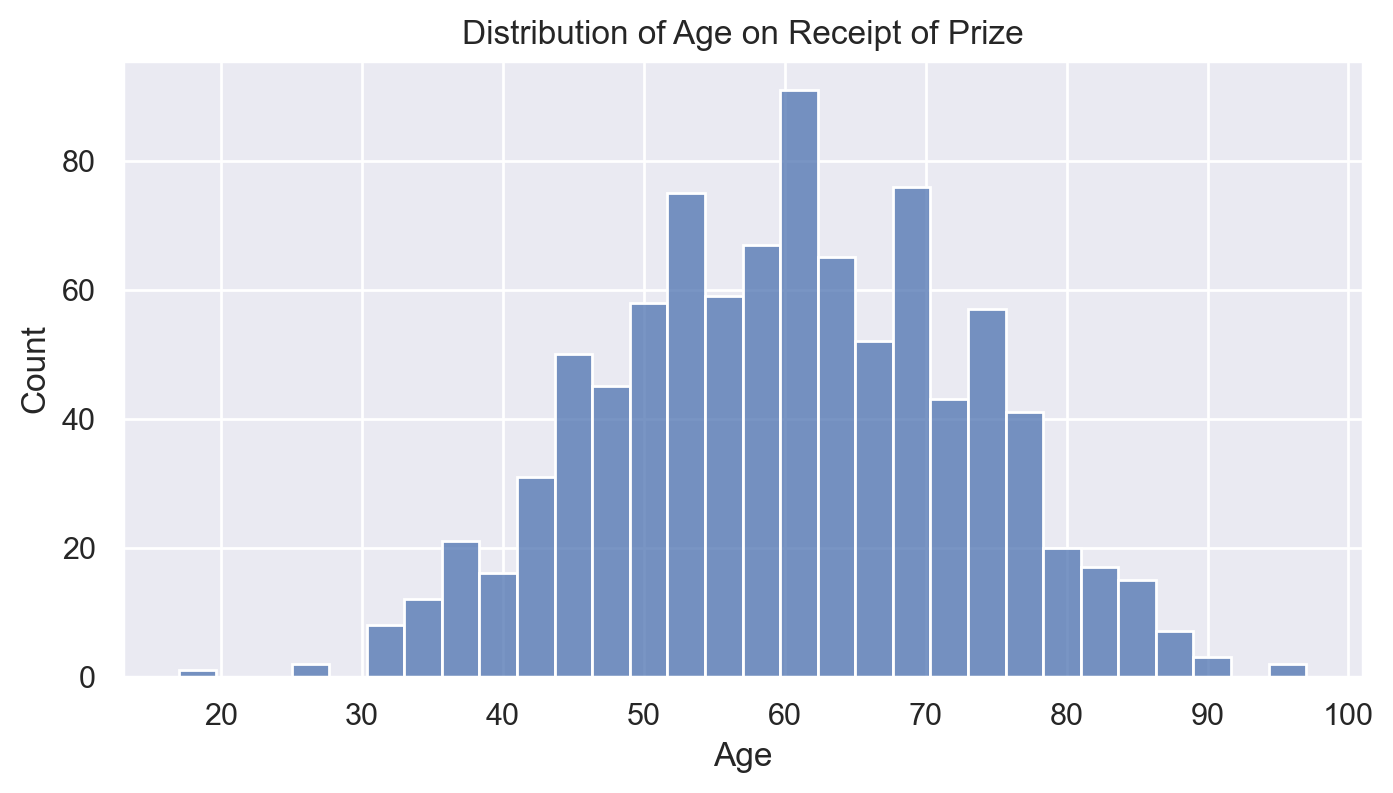

In [51]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?


* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


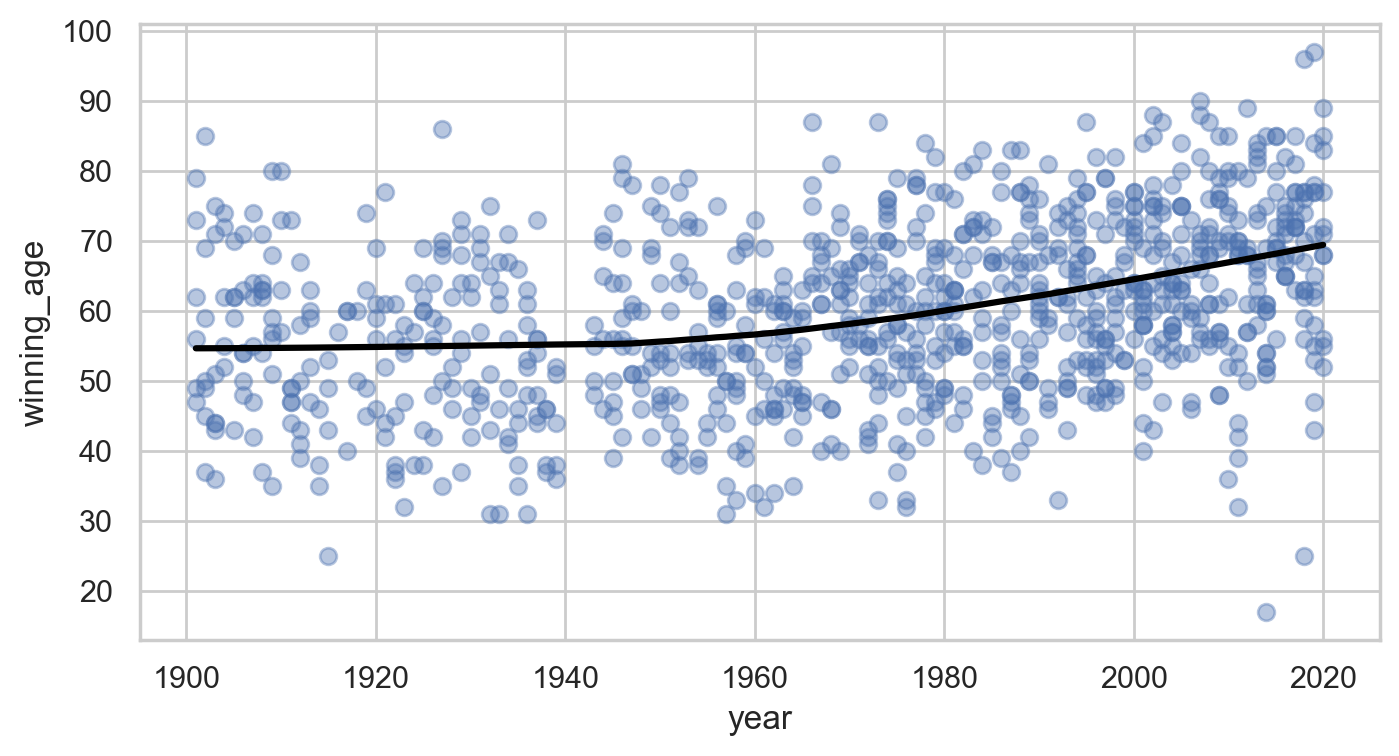

In [52]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
plt.show()

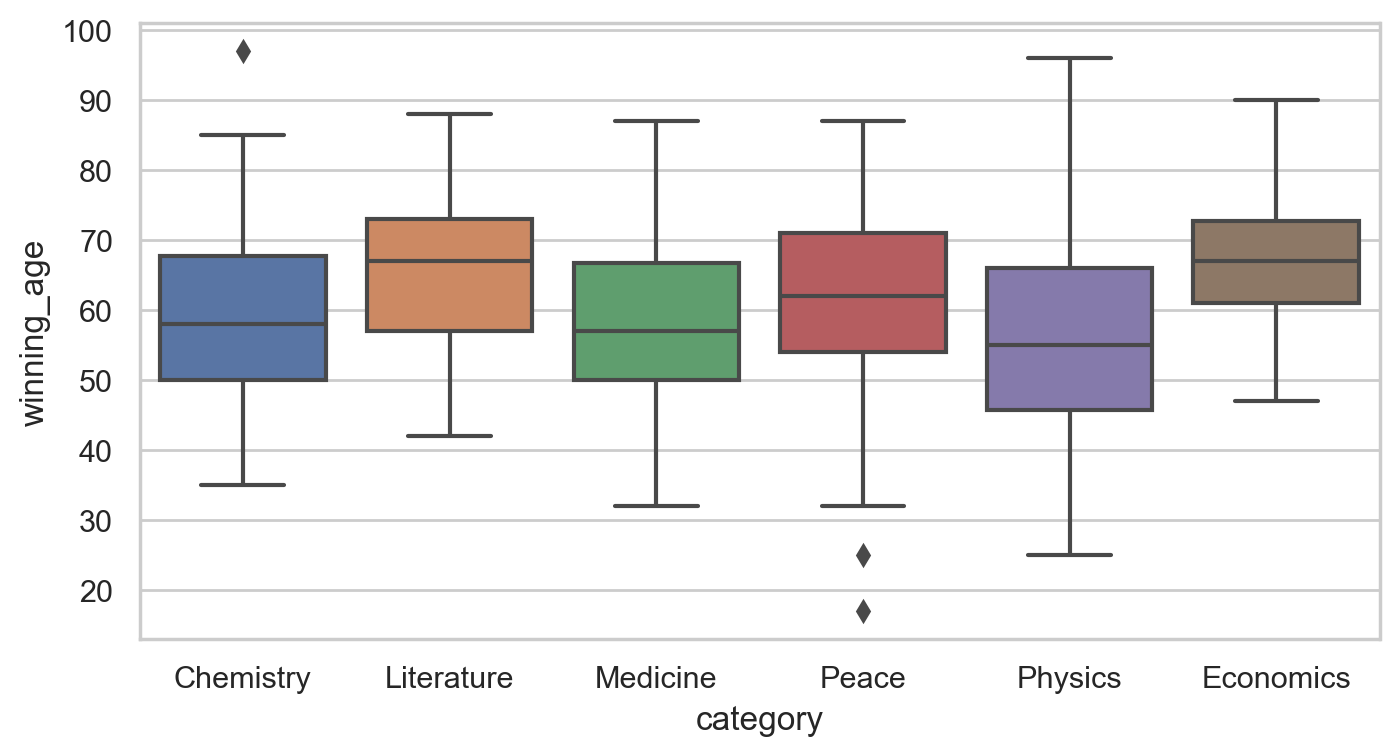

In [53]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1600x1600 with 0 Axes>

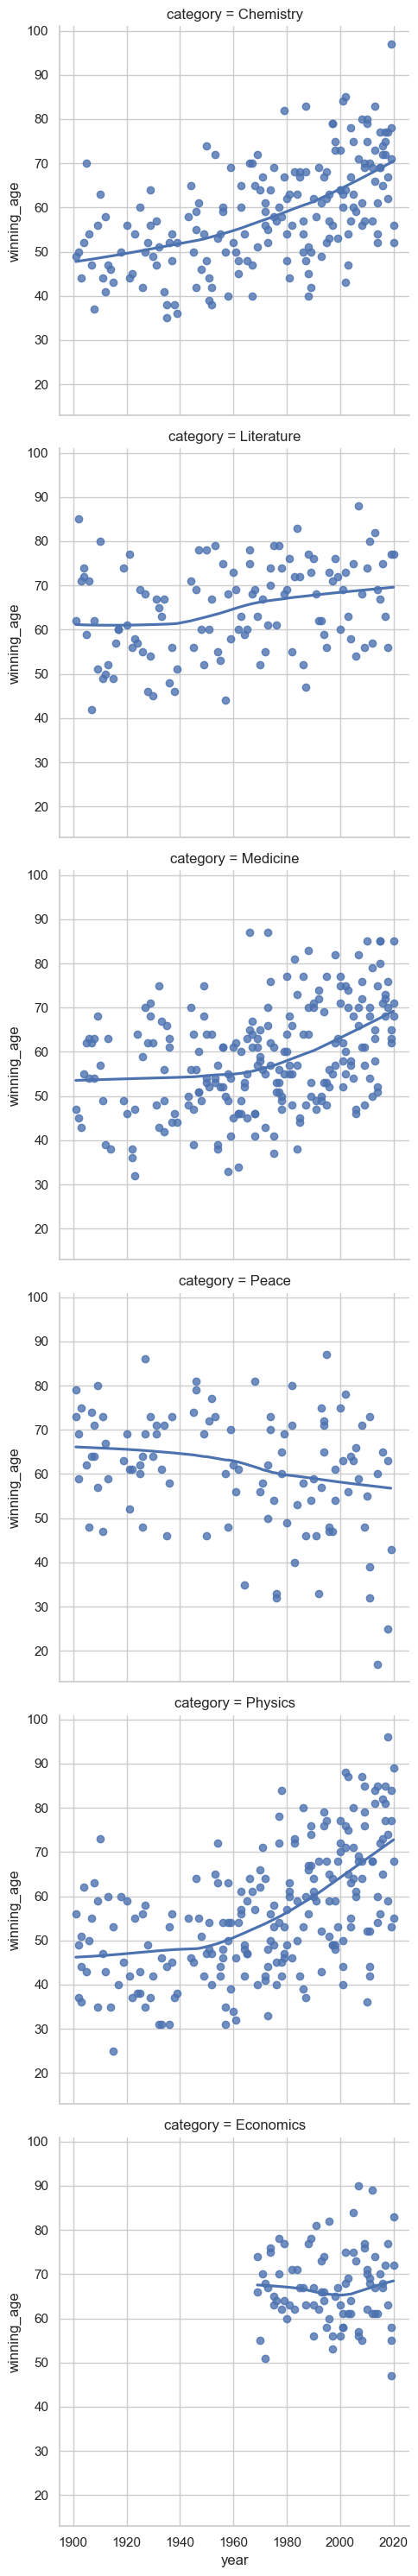

In [54]:
plt.figure(figsize=(8,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,x="year",
                y='winning_age',row="category",lowess=True)
plt.show()

<Figure size 1600x1600 with 0 Axes>

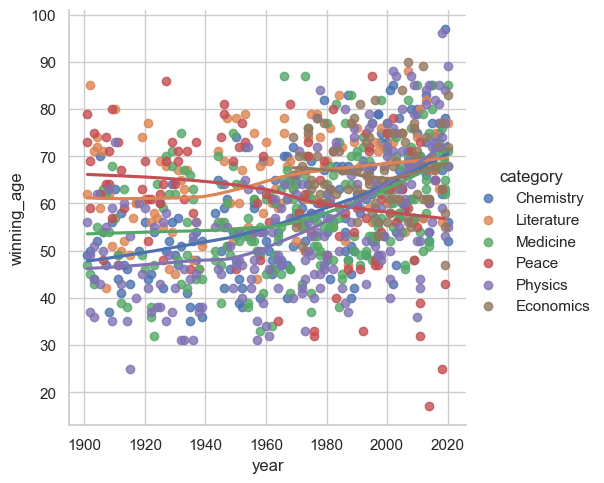

In [55]:
plt.figure(figsize=(8,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,x="year",
                y='winning_age',hue="category",lowess=True)
plt.show()

In [56]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

<BarContainer object of 4 artists>

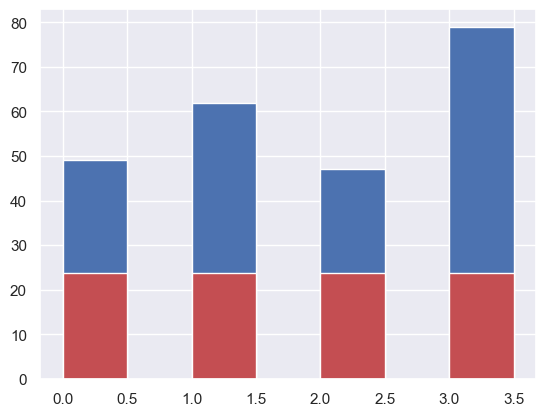

In [81]:
import numpy as np 
import matplotlib.pyplot as plot 
 
 
_df = pd.DataFrame(dict(
    a1=[2, 3, 5, 7],
    a2=[4, 6, 13.2, 12],
    a3=[1.2, 3.3, 4.1, 6.3],
    a4=[4.3, 5.1, 7.9, 11.2]))
 
# Stacked grouped bar chart
plot.bar([0, 1, 2, 3], df_data.winning_age[0:4], align='edge', width= 0.5,color='b')
plot.bar([0, 1, 2, 3], (df_data.year/80)[0:4], align='edge', width= 0.5,color='r')
